# Downloading Buff ML Dataset 

In [14]:
# Download the project folder 


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JV9T1BWChbRZmyaSSCy8kSN87e4UYXxh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JV9T1BWChbRZmyaSSCy8kSN87e4UYXxh" -O Android-App-Skin-Cancer-Detector.zip && rm -rf /tmp/cookies.txt

--2023-01-29 16:02:37--  https://docs.google.com/uc?export=download&confirm=t&id=1JV9T1BWChbRZmyaSSCy8kSN87e4UYXxh
Resolving docs.google.com (docs.google.com)... 142.250.128.100, 142.250.128.138, 142.250.128.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/orm2kteiao4fjr8ee1fsukkj0223fa1f/1675008150000/11031044337039581497/*/1JV9T1BWChbRZmyaSSCy8kSN87e4UYXxh?e=download&uuid=c95b168f-48a9-4a26-b3c3-a9226f0c2abf [following]
--2023-01-29 16:02:37--  https://doc-14-c4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/orm2kteiao4fjr8ee1fsukkj0223fa1f/1675008150000/11031044337039581497/*/1JV9T1BWChbRZmyaSSCy8kSN87e4UYXxh?e=download&uuid=c95b168f-48a9-4a26-b3c3-a9226f0c2abf
Resolving doc-14-c4-docs.googleusercontent.com (doc-14-c4-docs.googleusercontent.com)... 74.125.69.13

In [15]:
# Extract the dataset
!unzip Android-App-Skin-Cancer-Detector.zip

Archive:  Android-App-Skin-Cancer-Detector.zip
   creating: Android-App-Skin-Cancer-Detector/
   creating: Android-App-Skin-Cancer-Detector/Testing/
   creating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/
  inflating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gitignore  
   creating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/
   creating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/5.1.1/
   creating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/5.1.1/executionHistory/
  inflating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/5.1.1/executionHistory/executionHistory.bin  
  inflating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/5.1.1/executionHistory/executionHistory.lock  
   creating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/5.1.1/fileChanges/
  inflating: Android-App-Skin-Cancer-Detector/Testing/SmartDoctor/.gradle/5.1.1/fileChanges/last-build.bin  
   creat

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


In [2]:
train_dir='/content/Android-App-Skin-Cancer-Detector/Training/Dataset'
Labels = ['Benign', 'Malignant']
print ("class : ") 
for i in range(len(Labels)): 
    print (i, end = " ") 
    print (Labels[i])
print('Number of classes:',len(Labels))
module_selection = ("mobilenet_v2", 224, 1280) 
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16     

class : 
0 Benign
1 Malignant
Number of classes: 2


#Load DataSet 

In [126]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest',
      validation_split=0.25)
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE)
test_generator = train_datagen.flow_from_directory(
    train_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    subset="validation",
    target_size=IMAGE_SIZE)

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [75]:
x,y=train_generator[0]

#Data Augmantation

In [66]:
# Define the augmantation functions 
import numpy as np

from tensorflow.keras import layers
Flip_Aug = Sequential([
	layers.RandomFlip("horizontal_and_vertical")
])
RandomZoom_Aug = Sequential([
	
	layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15))
])
RandomRotation_Aug = Sequential([
	layers.RandomRotation(0.3)
])

def augmantate_data(x,y):
  a=Flip_Aug(x).numpy()
  b=RandomZoom_Aug(x).numpy()
  c=RandomRotation_Aug(x).numpy()
  x=np.concatenate((x,a))
  x=np.concatenate((x,b))
  x=np.concatenate((x,c))
  y1=np.concatenate((y,y))
  y1=np.concatenate((y1,y))
  y1=np.concatenate((y1,y))
  return x,y1


In [76]:
# Data Size Before augmantationn 
print(x.shape)
print(y.shape)
print('Sample Number : ',len(x))

(30, 224, 224, 3)
(30, 2)
Sample Number :  30


In [77]:
# Apply Data  Augmantation
X_train,y_train=augmantate_data(x,y)
# Data Size After Augmantation 
print(X_train.shape)
print(y_train.shape)
print('Sample Number : ',len(X_train))

(120, 224, 224, 3)
(120, 2)
Sample Number :  120


# Define Model based on the pretrained EfficientNetV2 model

In [90]:
# Define  Our custom CNN model based on the pretrained EfficientNetV2 model

feature_extractor = hub.KerasLayer(MODULE_HANDLE,input_shape=IMAGE_SIZE+(3,), output_shape=[FV_SIZE])
# Transfer Learning of top layers of EfficientNetv2’s feature extractor
# We will not train the EfficientNetv2’s feature extractor
feature_extractor.trainable = False
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_17 (KerasLayer)  (None, 1280)             2257984   
                                                                 
 flatten_17 (Flatten)        (None, 1280)              0         
                                                                 
 dense_41 (Dense)            (None, 512)               655872    
                                                                 
 batch_normalization_24 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_42 (Dense)            (No

In [91]:
LEARNING_RATE = 0.001 
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE,decay=1e-04), # weight decay to prevent overfitting,
   loss='categorical_crossentropy',
   metrics=['accuracy'])
# Adding Early Stop to Avoid overfitting and a good result
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=6,verbose=1)

In [92]:
EPOCHS=50
history = model.fit(x=X_train,y=y_train, batch_size=16,epochs=EPOCHS,shuffle=True,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/50
6/6 [==============================] - 4s 135ms/step - loss: 0.6334 - accuracy: 0.7917 - val_loss: 0.1886 - val_accuracy: 0.9167
Epoch 2/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0504 - accuracy: 0.9896 - val_loss: 0.0703 - val_accuracy: 1.0000
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 8/50
6/6 [==========

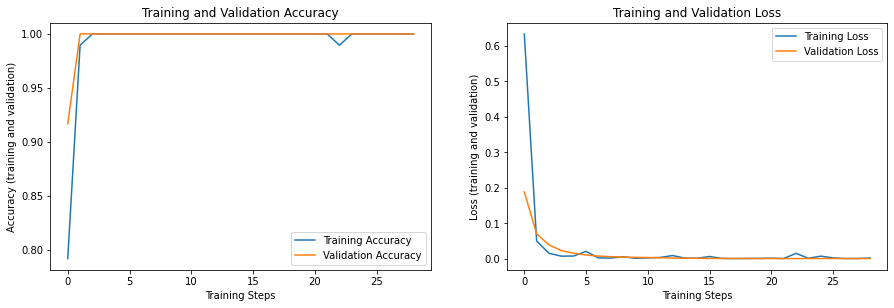

In [94]:
import matplotlib.pylab as plt
import numpy as np
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['accuracy']))
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

1/1 [==============================] - 0s 25ms/step
class: Malignant, confidence: 0.761898


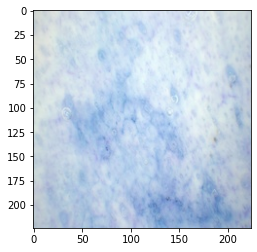

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
class: Benign, confidence: 0.999396


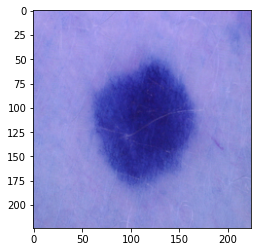

1/1 [==============================] - 0s 21ms/step
class: Benign, confidence: 0.995108


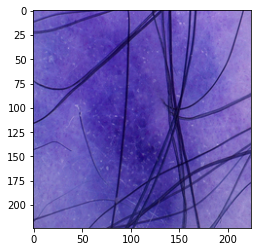

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 22ms/step
class: Benign, confidence: 0.999237


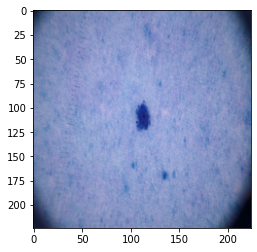

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 23ms/step
class: Benign, confidence: 0.611736


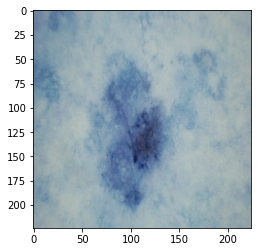

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
class: Malignant, confidence: 0.864703


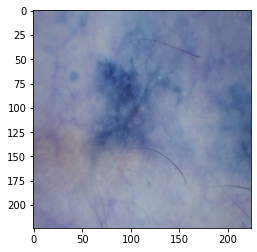

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 23ms/step
class: Benign, confidence: 0.817656


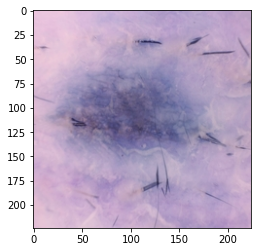

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 23ms/step
class: Benign, confidence: 0.505777


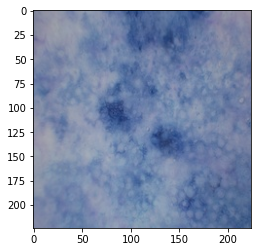

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
class: Malignant, confidence: 0.524358


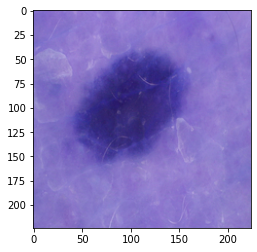

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
class: Benign, confidence: 0.550737


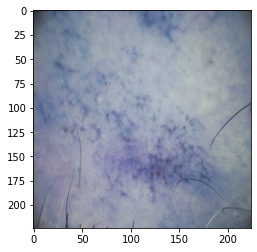

<Figure size 432x288 with 0 Axes>

In [127]:
import random
import cv2
def upload(filename):
    img = cv2.imread(os.path.join(train_dir, filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    return img
def pre_result(image):
    x = model.predict(np.asarray([img]))[0]
    classx = np.argmax(x)
    return {Labels[classx]: x[classx]}
images = random.sample(test_generator.filenames, 10)
for idx, filename in enumerate(images):
    img = upload(filename)
    prediction = pre_result(img)
    print("class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [128]:
# Evaluate the model on the Test DataSet
model.evaluate(test_generator[0][0],test_generator[0][1])

1/1 [==============================] - 0s 30ms/step - loss: 0.1778 - accuracy: 0.9000


[0.17778757214546204, 0.8999999761581421]

In [132]:
y_pred=model(test_generator[0][0])
y_pred=np.argmax(y_pred.numpy(),axis=-1)

In [133]:
y=np.argmax(test_generator[0][1],axis=-1)

Confusion Matrix


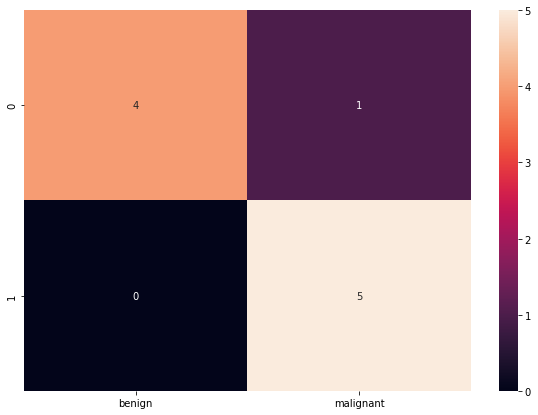

In [134]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(np.argmax(test_generator[0][1],axis=-1), y_pred)
df = pd.DataFrame(cm, columns=test_generator.class_indices)
plt.figure(figsize=(10,7))
sn.heatmap(df, annot=True)